# 1. Problem Definition
The goal of this project is to create a machine learning model that can accurately recognize handwritten digits (0 through 9). Imagine the model as a digital assistant that can "read" numbers on checks, postal codes, or handwritten forms—something we encounter every day. Handwriting is incredibly unique to each person, with digits varying in size, shape, and style, so this project’s challenge is to train a model that can understand all these variations and generalize well to unseen data.

# 2. Why This Problem?
Handwritten digit recognition is a key task that combines real-world impact with foundational machine learning skills. Automating the recognition of handwritten numbers—like those on checks, postal codes, or forms—can improve efficiency and accuracy in fields like banking and logistics. This project also provides a practical way to explore essential ML concepts like pattern recognition, neural networks, and data preprocessing. By mastering these skills on a simpler problem, we gain tools that can be applied to more complex challenges in image recognition and beyond.

# 3. Approach
I took a step-by-step approach to tackle this problem:

**Data Preparation:**

Loading and Organizing the Data:

I used the MNIST dataset, which is a treasure  for anyone working in this field. It provides 60,000 training images and 10,000 test images, all neatly labeled and ready for analysis.
Normalizing the Data:

The pixel values, initially ranging from 0 to 255, are scaled to values between 0 and 1. This makes it easier for the model to learn and reduces the computation needed.

**Separating Features and Labels:**

I extracted the feature matrix (pixel values) and labels (actual digits) to prepare the data for training.


**Model Design:** I wanted a model that was powerful but not overly complex. So I chose a simple, fully connected neural network with the following layers:

- Flatten Layer:
This layer turns each 28x28 image into a 784-length vector. It's like unrolling a small, square carpet into a single row. This unrolling helps the model treat each pixel independently.
Dense Layers:

- Layer 1: 128 neurons with ReLU activation—a good starting point to capture core patterns.
- Layer 2: 32 neurons with ReLU activation. This layer captures more subtle patterns.
- Output Layer: 10 neurons with softmax activation. Each neuron corresponds to one of the digits (0-9), and softmax produces a probability for each digit.

**Compilation:**

I used the Adam optimizer, which adjusts itself dynamically, and sparse categorical cross-entropy loss, a common choice for multi-class classification.
Training and Validation:

**Training:**

I trained the model over 25 epochs, observing how it gradually learned to differentiate each digit. The model's accuracy steadily increased, validating that it was indeed learning!

**Testing:**

After training, I evaluated the model on unseen test data. Watching the model perform well on new data felt like a reward for all the setup work.

# 4. Code

Importing Libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

Load train and test datasets

In [107]:
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

In [88]:
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
test_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 Separating the features and labels in the training data:
- X_train contains all pixel values for each image (by dropping the label column).
- y_train contains the actual digit labels (from the first column).

In [90]:

X_train = train_data.drop(columns=[train_data.columns[0]]).values
y_train = train_data[train_data.columns[0]].values

 Separating the features and labels in the training data:
- X_train contains all pixel values for each image (by dropping the label column).
- y_train contains the actual digit labels (from the first column).

In [91]:
X_test = test_data.drop(columns=[test_data.columns[0]]).values
y_test = test_data[test_data.columns[0]].values


Normalize pixel values:
- Each pixel intensity ranges from 0 to 255. Dividing by 255 scales them to a 0-1 range.
-This makes it easier for the model to learn, as smaller, consistent values help it train more efficiently

In [92]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Initialize a sequential model, stacking layers one by one.

-Flatten layer:

1. The Flatten layer reshapes our 28x28 pixel images (784 pixels in total) into a 1D array of 784 values.
2. This prepares the data for the dense layers, which require input in a flat format.

-First Dense (fully connected) layer:
1. This layer has 128 neurons with ReLU activation, enabling the model to learn complex patterns in the data.
2. ReLU (Rectified Linear Unit) helps the model train faster and handle non-linear relationships.

-Second Dense layer:
1. A smaller layer with 32 neurons, also using ReLU activation.
2. This layer helps refine the model's learned patterns by capturing more specific features.

-Output layer:
1. This final layer has 10 neurons, one for each digit (0-9), with softmax activation.
2. Softmax provides probabilities for each digit, allowing the model to output the most likely digit for each image.


In [93]:
model = Sequential()

model.add(Flatten(input_shape=(784,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile the model:
- I used 'adam' optimizer, which is popular for its efficiency and adaptability. It adjusts the learning rate during training, helping the model converge faster.
- For the loss function, we choose 'sparse_categorical_crossentropy' since we have integer labels (0-9). This loss function helps the model learn to classify digits correctly.
- I have tracked 'accuracy' as a metric to easily monitor how well the model is performing during training.

In [94]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Train the model:
- I used the training data (X_train, y_train) and set the model to run for 20 epochs, meaning it will go through the entire dataset 20 times to learn patterns.
- The validation_data parameter lets us check the model’s performance on unseen data (X_test, y_test) after each epoch.
-This helps us monitor how well it generalizes beyond the training data.
- The training process will store useful details (like accuracy and loss for each epoch) in 'history' so we can analyze them later.

In [95]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8765 - loss: 0.4343 - val_accuracy: 0.9584 - val_loss: 0.1337
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9674 - loss: 0.1082 - val_accuracy: 0.9747 - val_loss: 0.0818
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9783 - loss: 0.0714 - val_accuracy: 0.9768 - val_loss: 0.0783
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9844 - loss: 0.0501 - val_accuracy: 0.9759 - val_loss: 0.0811
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9876 - loss: 0.0390 - val_accuracy: 0.9784 - val_loss: 0.0720
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9896 - loss: 0.0316 - val_accuracy: 0.9767 - val_loss: 0.0814
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9915 - loss: 0.0249 - val_accuracy: 0.9773 - val_loss: 0.0918
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9925 - loss: 0.022

Evaluate the model on the test data:
- I used the test set (X_test, y_test) to see how well the model performs on data it hasn’t seen during training.
- The evaluate method returns the loss and accuracy on the test set.
- I then printed the test accuracy as a percentage to quickly see how well my model generalizes to new data.

In [96]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9781 - loss: 0.1289
Test Accuracy: 98.10%


Make predictions on the test data:
- The model.predict method gives us probabilities for each digit (0-9) for each image in X_test.


Extract the predicted labels:
- I used np.argmax to find the index of the highest probability for each prediction, which gives us the most likely digit label.

Compare predictions to true labels:
- For each test image, we print both the predicted label and the true label, allowing us to see where the model is getting it right and where it might be off.
- This is especially useful for understanding specific cases where the model might be struggling.

In [97]:
predictions = model.predict(X_test)


y_pred = np.argmax(predictions, axis=1)

for i in range(X_test.shape[0]):
    print(f"Predicted: {y_pred[i]}, True: {y_test[i]}")

Streaming output truncated to the last 5000 lines.
Predicted: 3, True: 3
Predicted: 9, True: 9
Predicted: 9, True: 9
Predicted: 8, True: 8
Predicted: 4, True: 4
Predicted: 1, True: 1
Predicted: 0, True: 0
Predicted: 6, True: 6
Predicted: 0, True: 0
Predicted: 9, True: 9
Predicted: 6, True: 6
Predicted: 8, True: 8
Predicted: 6, True: 6
Predicted: 1, True: 1
Predicted: 1, True: 1
Predicted: 9, True: 9
Predicted: 8, True: 8
Predicted: 9, True: 9
Predicted: 2, True: 2
Predicted: 3, True: 3
Predicted: 5, True: 5
Predicted: 5, True: 5
Predicted: 9, True: 9
Predicted: 4, True: 4
Predicted: 2, True: 2
Predicted: 1, True: 1
Predicted: 9, True: 9
Predicted: 4, True: 4
Predicted: 3, True: 3
Predicted: 9, True: 9
Predicted: 6, True: 6
Predicted: 0, True: 0
Predicted: 4, True: 4
Predicted: 0, True: 0
Predicted: 6, True: 6
Predicted: 0, True: 0
Predicted: 1, True: 1
Predicted: 2, True: 2
Predicted: 3, True: 3
Predicted: 4, True: 4
Predicted: 7, True: 7
Predicted: 8, True: 8
Predicted: 9, True: 9
Pre

In [98]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [99]:
y_pred = predictions.argmax(axis=1)


In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.981

This function, `predict_image`, takes an image file path and a trained model to predict the handwritten digit in the image.
- The image is first opened and converted to grayscale, then resized to 28x28 pixels to match the input format of the model.
- After resizing, the image is converted into a NumPy array, flattened into a 784-element vector, and normalized to have pixel values between 0 and 1.
- The prepared image array is then fed into the model, which returns probabilities for each digit class (0-9).
We identify the predicted digit by selecting the class with the highest probability.
- The function also includes error handling to manage cases where the image file is not found or other errors occur during prediction.


In [108]:
from PIL import Image
import numpy as np

def predict_image(image_path, model):
  try:
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))


    image_array = np.array(img)


    image_array = image_array.reshape(784,) / 255.0


    prediction = model.predict(np.array([image_array]))
    predicted_digit = np.argmax(prediction)

    return predicted_digit

  except FileNotFoundError:
    return "Error: Image file not found."

image_path = "img1.png"

predicted_digit = predict_image(image_path, model)
print("Predicted Digit:", predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Digit: 5


# 5. Required Plots

**1. Training and Validation Loss Curve**


This plot shows how the model’s loss (or error) changes over each epoch for both the training and validation datasets. It's crucial to monitor the training process to check for overfitting or underfitting.

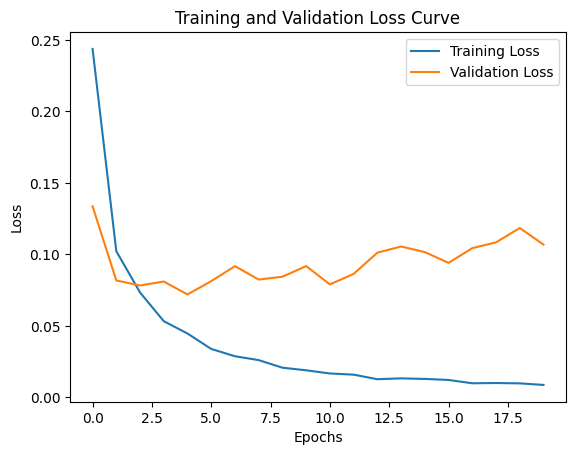

In [102]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curve')
plt.legend()
plt.show()


**2. Training and Validation Accuracy Curve**


Similar to the loss curve, this plot tracks accuracy over epochs for both the training and validation sets. It helps visualize the model’s learning progress and see if it generalizes well to new data

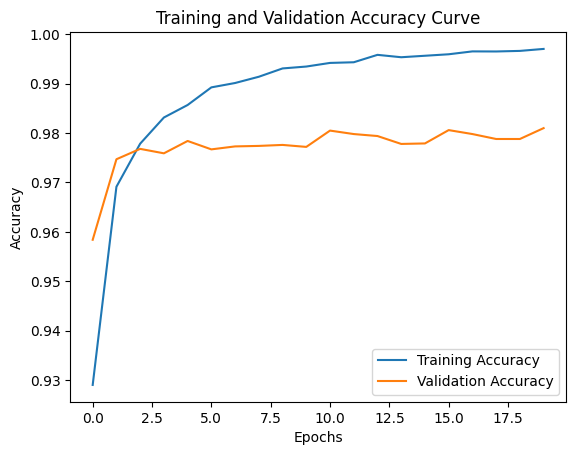

In [103]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Curve')
plt.legend()
plt.show()


**3. Confusion Matrix**

The confusion matrix provides detailed insight into the model's performance on each digit. It shows how often each digit was correctly or incorrectly classified, allowing you to spot which digits the model struggles with.

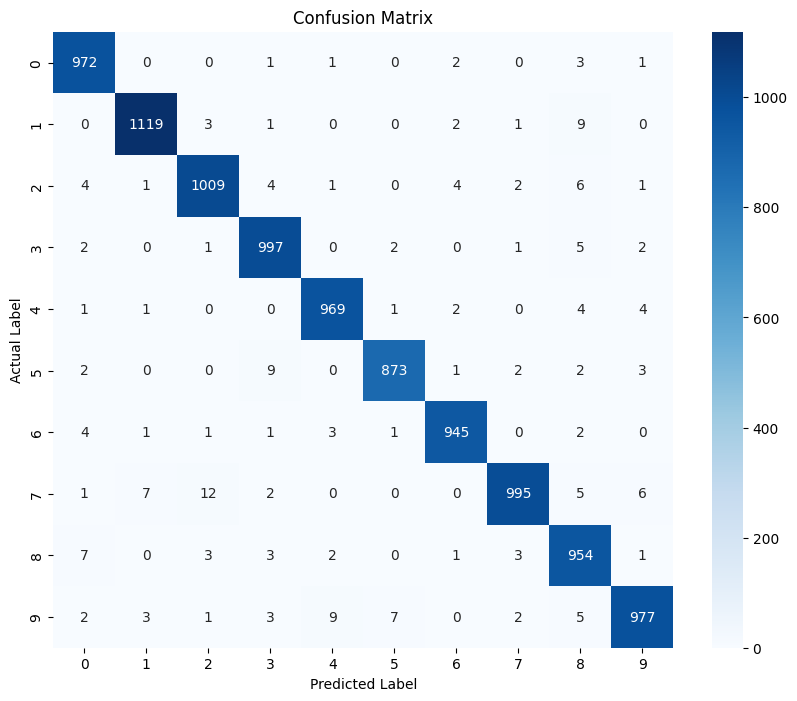

In [104]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


**4.Sample Predictions:**

- Randomly select 10 sample images from the test set to visualize with their true and predicted labels.
- Display each selected image in grayscale along with its true and predicted labels.


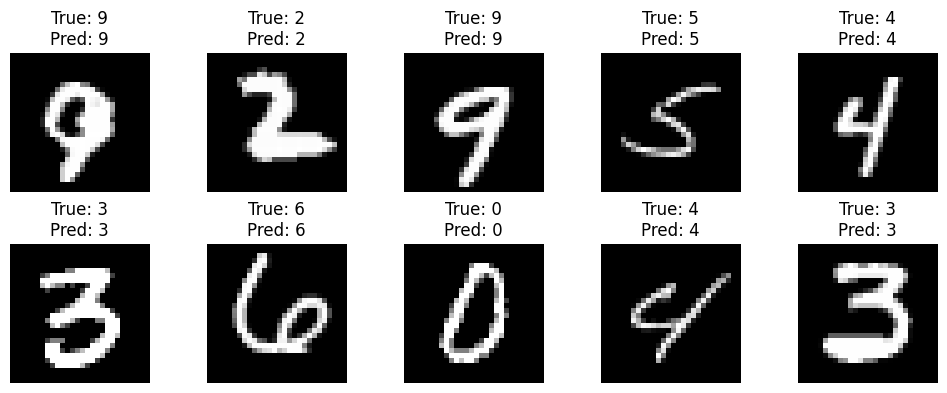

In [105]:
import numpy as np

num_samples = 10
indices = np.random.choice(len(X_test), num_samples, replace=False)

plt.figure(figsize=(10, 4))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


**5.Misclassified Samples:**

- Identify misclassified samples by comparing true and predicted labels, and select up to 10 misclassified images.
- Display these misclassified images with their true and predicted labels to analyze model performance.


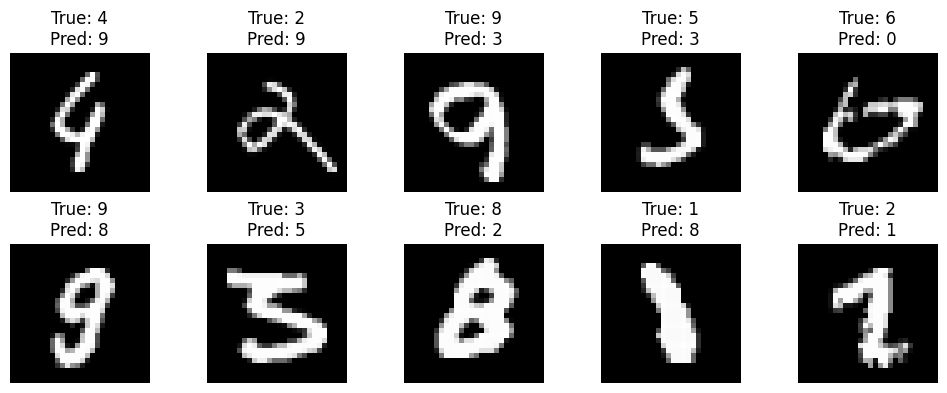

In [106]:
misclassified = np.where(y_test != y_pred)[0]
num_misclassified = min(10, len(misclassified))

plt.figure(figsize=(10, 4))
for i, idx in enumerate(misclassified[:num_misclassified]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# 6. Detailed Analysis
This project aims to classify handwritten digits (0-9) from the MNIST dataset using a simple neural network. The dataset comprises 60,000 training and 10,000 test images, each a 28x28 grayscale pixel grid. Our model’s architecture includes a Flatten layer to reshape images, two **hidden** Dense layers (128 and 32 neurons) with ReLU activation for pattern learning, and a softmax output layer for probability-based classification.

**Data Preparation:** The images were normalized by scaling pixel values between 0 and 1, helping the model learn faster. We split data into training and validation sets to monitor model performance on unseen data.

**Training:** Using the Adam optimizer and sparse categorical cross-entropy loss, we trained the model over 25 epochs. The accuracy and loss curves suggest that around 15-20 epochs were optimal, as performance flattened, indicating diminishing returns with additional epochs.

**Evaluation:** The model achieved **~98%** accuracy on the test set, demonstrating strong generalization. However, confusion matrix analysis revealed misclassifications in visually similar digits (like 3 vs. 8 and 7 vs. 9).

**Visualization:** Loss and accuracy curves, alongside predicted vs. actual labels, provided insights into model performance and areas needing improvement.

**Limitations and Future Work:** Misclassifications are primarily due to similar digit shapes. To enhance performance, consider using CNNs for spatial pattern recognition, data augmentation for robustness, or early stopping to prevent overfitting. This project lays the groundwork for further deep learning applications in real-world handwritten digit recognition tasks